In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, confusion_matrix

## Data Source

- The data set, which was initially created by IBM data scientists in 2017, is from the Kaggle platform (link). As Human Resources data is highly confidential, the data provided here is fictional but structured similarly to real data. It has 1470 rows and 35 columns, and each row indicates each employee data. This data set has no missing values. As for the response variable, Attrition, it consists of 237 of ‘Yes’ values and 1233 of ‘No’ values. The following table explains each variable with short description and type. 
- Dataset link: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

## Variable Description

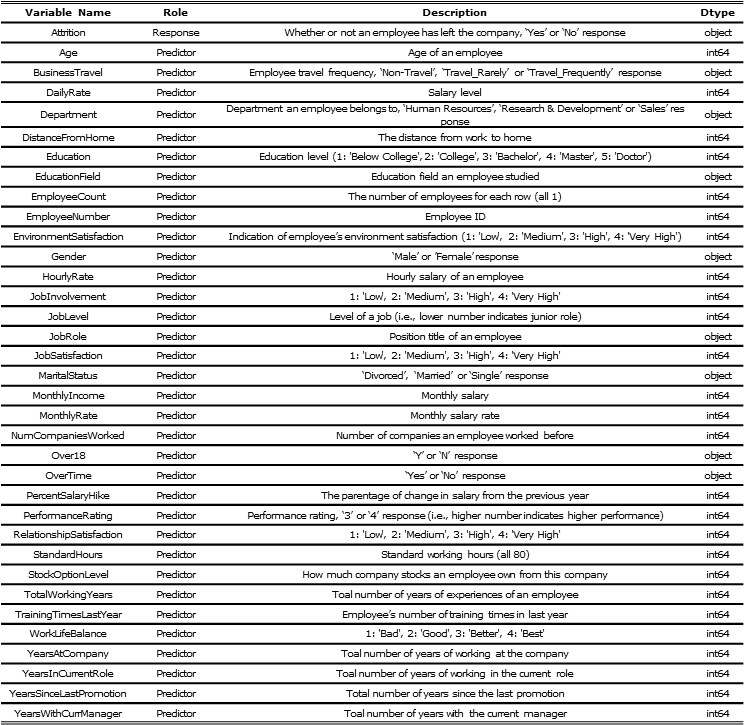

In [2]:
Image('var_description.png')

## 1. Basic Information of Data

In [3]:
# load the data
os.getcwd()
data = pd.read_csv("dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# missing data check
data = data.copy()

print(f'# of missing data : {(data.isna().any(axis=1)).sum()}')

# white space check
check_spaces = data.apply(lambda x: x.map(lambda x: str(x).isspace()))
print(f'# of white space data : {check_spaces.any(axis=1).sum()}')

# of missing data : 0
# of white space data : 0


In [4]:
# check the basic info of data
data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
# check the first 5 rows of data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<font size="3">In this analysis, the purpose is to find out if there is any significant difference in groups between high performers and average performers. Dimension reduction and Clustering methods are employed to further investigation and vizualization. </font>


## 2. Data Preprocessing

In [6]:
# PerformanceRating variable transformation
data["PerformanceRating"] = data["PerformanceRating"].apply(lambda x : 1 if x == 4 else 0) 

# Check the EmployeeNumber duplication
print(f'# of duplicated Employee Number in the data : {sum(data["EmployeeNumber"].duplicated())}') # 0

# Remove duplicated or similar metrics variables
data = data.drop(columns = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"])

# EmployeeCount : It's all 1
# EmployeeNumber : Just an indicator of each employee
# Over18, StandardHours : All data points have the same values in these variables 

# check the number of the variables in new data
print(f'The number of the variables in after the data preprocess : {len(data.columns)}')

# of duplicated Employee Number in the data : 0
The number of the variables in after the data preprocess : 31


## 3. High Performers vs Average Performers 

### 3.1. PCA, ISOMAP plots of Data

Cumulative explained variance of 2 PCs : 0.2488254636989684


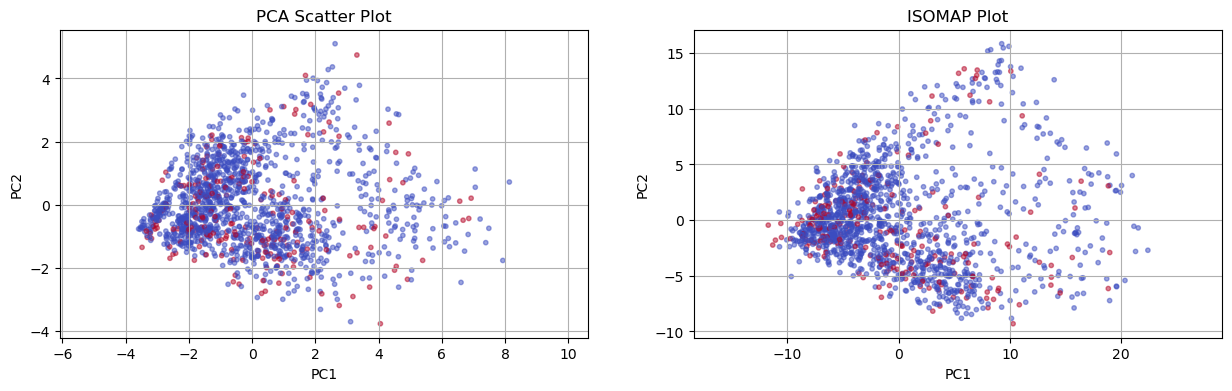

In [7]:
# PCA

# Notice that it is just to roughly check how the data is structured. Therefore potential outliers were not removed.
# Considering low explained variance ratio, it could be not fully representing the data.

# create dummy variables from predictors
data_plot = pd.get_dummies(data.drop(columns = ["PercentSalaryHike"])) 
data_plot_numeric_col = data_plot.select_dtypes(include=['int64', 'float64']).columns
    
# scaling numerical variables
data_plot[data_plot_numeric_col] = StandardScaler().fit(data_plot[data_plot_numeric_col]).transform(data_plot[data_plot_numeric_col]) 


plt.figure(figsize=(15, 4)) 

# PCA 
plt.subplot(1, 2, 1)  
pca = PCA(n_components =2).fit(data_plot)
pc = pca.transform(data_plot)
print(f'Cumulative explained variance of 2 PCs : {sum(pca.explained_variance_ratio_)}') 
# plot
plt.scatter(pc[:,0], pc[:,1], s=10, c= data_plot["PerformanceRating"], alpha=0.5, cmap="coolwarm")
plt.title(f'PCA Scatter Plot')
plt.xlabel('PC1')  
plt.ylabel('PC2')
plt.axis('equal')
plt.grid()

# ISOMAP 
plt.subplot(1, 2, 2)  
isomap = Isomap(n_components=2, n_neighbors=5)
X_reduced = isomap.fit_transform(data_plot)
# plot 
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=10, alpha=0.5, c= data_plot["PerformanceRating"], cmap="coolwarm")
plt.title(f'ISOMAP Plot')
plt.xlabel('PC1')  
plt.ylabel('PC2')
plt.axis('equal')
plt.grid()

plt.show()


<font size="3"> Based on the dimension reduction methods result, linear and non-linear dimension reduction methods give similar result, showing that it is highly likely that there is no significant difference in given attributes between high performers and average performers groups. </font>


### 3.2. High Performers vs Average Performers Means Comparison

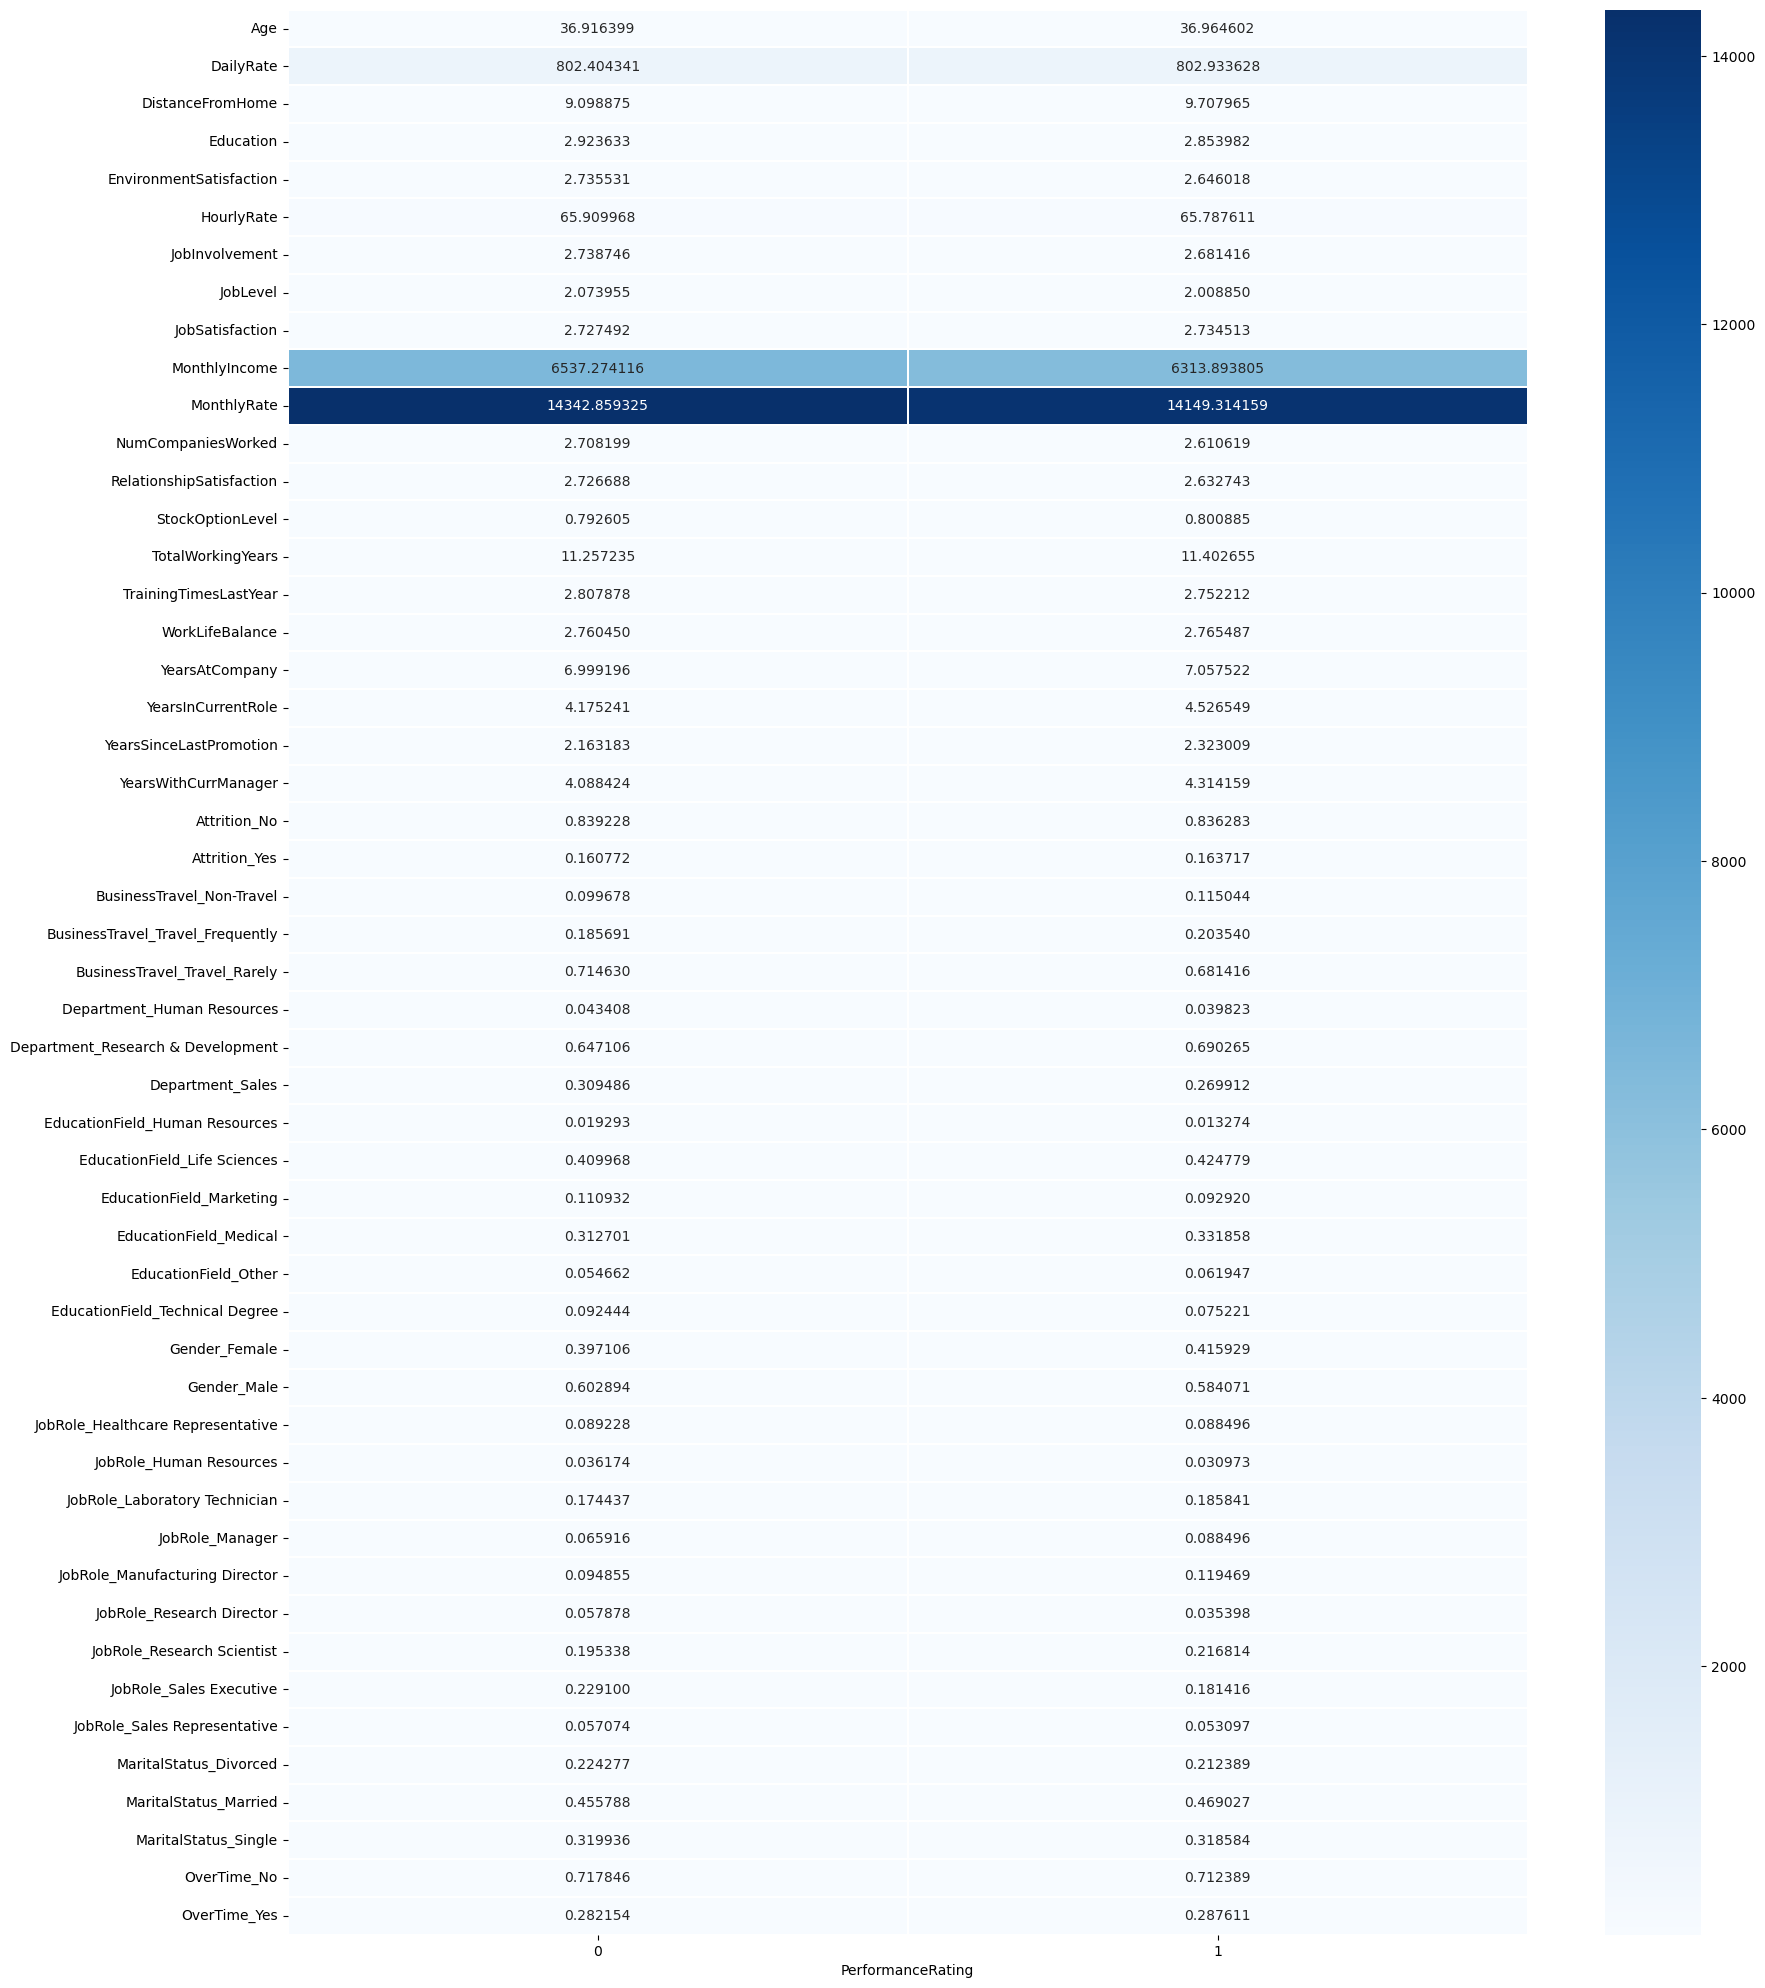

In [8]:
data_check = pd.get_dummies(data.drop(columns = ["PercentSalaryHike"])) 
performance_mean = data_check.groupby(["PerformanceRating"]).mean().T
plt.figure(figsize=(20, 25))
sns.heatmap(performance_mean, annot = True, fmt='1f', linewidth = 0.1, annot_kws = {'fontsize':10}, cmap="Blues")
plt.show()

In [9]:
# T-Test, W-Test
print(f'T-Test result : {ttest_ind(performance_mean[0], performance_mean[1])}')
print(f'W-Test result : {wilcoxon(performance_mean[0], performance_mean[1])}')

T-Test result : TtestResult(statistic=0.0189444731703281, pvalue=0.9849231491290674, df=100.0)
W-Test result : WilcoxonResult(statistic=662.5, pvalue=0.9962605209075409)


<font size="3"> Conclusion : As we can see, the heatmap above displays that there is almost no difference in the means of all variables. T-Test and W-Test results also show that p-values are not significant at all. Therefore, we can conclude that High Performers and Average Performers do not have a significant difference in the given factors, and we can assume that we cannot build a proper model that can nicely separate those two groups. </font>


<font size="3"> Employing a clustering method such as KMeans Clustering further confirms that the distinct groups observed in the employees are primarily based on their age and factors related to years of experience, rather than performance. (3.3 and 3.4) </font>


### 3.3. Clustering (Kmeans, Spectral) on ISOMAP

C:\Users\taewu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\taewu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\taewu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\taewu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

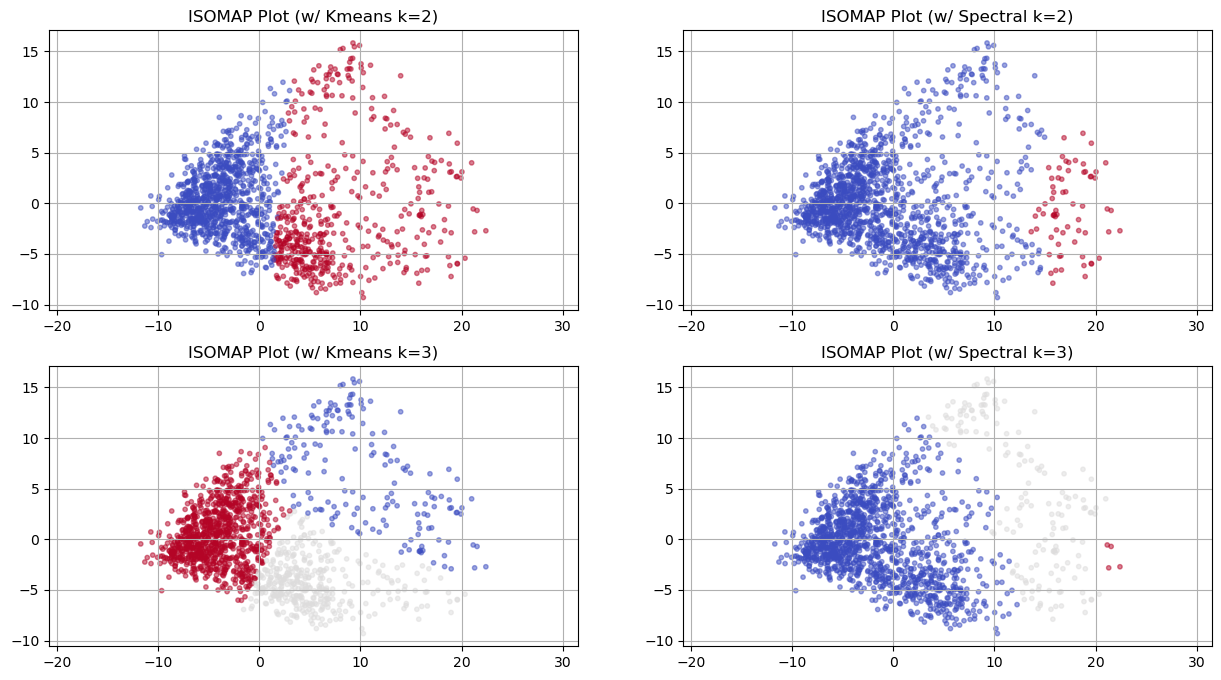

In [10]:
num_cluster = [2, 3]

fig, ax = plt.subplots(2, 2, figsize=(15, 8))  

for n in num_cluster :
    # Kmeans clustering
    kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto")
    y_pred = kmeans.fit_predict(X_reduced[:,:2])

    ax[n-2, 0].scatter(X_reduced[:,0], X_reduced[:,1], s=10, c=y_pred, alpha=0.5, cmap="coolwarm")
    ax[n-2, 0].set_title(f'ISOMAP Plot (w/ Kmeans k={n})')
    ax[n-2, 0].axis('equal')
    ax[n-2, 0].grid()
        
    # spectral clustering
    spectral_clustering = SpectralClustering(n_clusters=n, random_state=0)
    y_pred = spectral_clustering.fit_predict(X_reduced[:,:2])

    ax[n-2, 1].scatter(X_reduced[:,0], X_reduced[:,1], s=10, c=y_pred, alpha=0.5, cmap="coolwarm")
    ax[n-2, 1].set_title(f'ISOMAP Plot (w/ Spectral k={n})')
    ax[n-2, 1].axis('equal')
    ax[n-2, 1].grid()

plt.show()

### 3.4. Two Clusters Means Comparison

C:\Users\taewu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


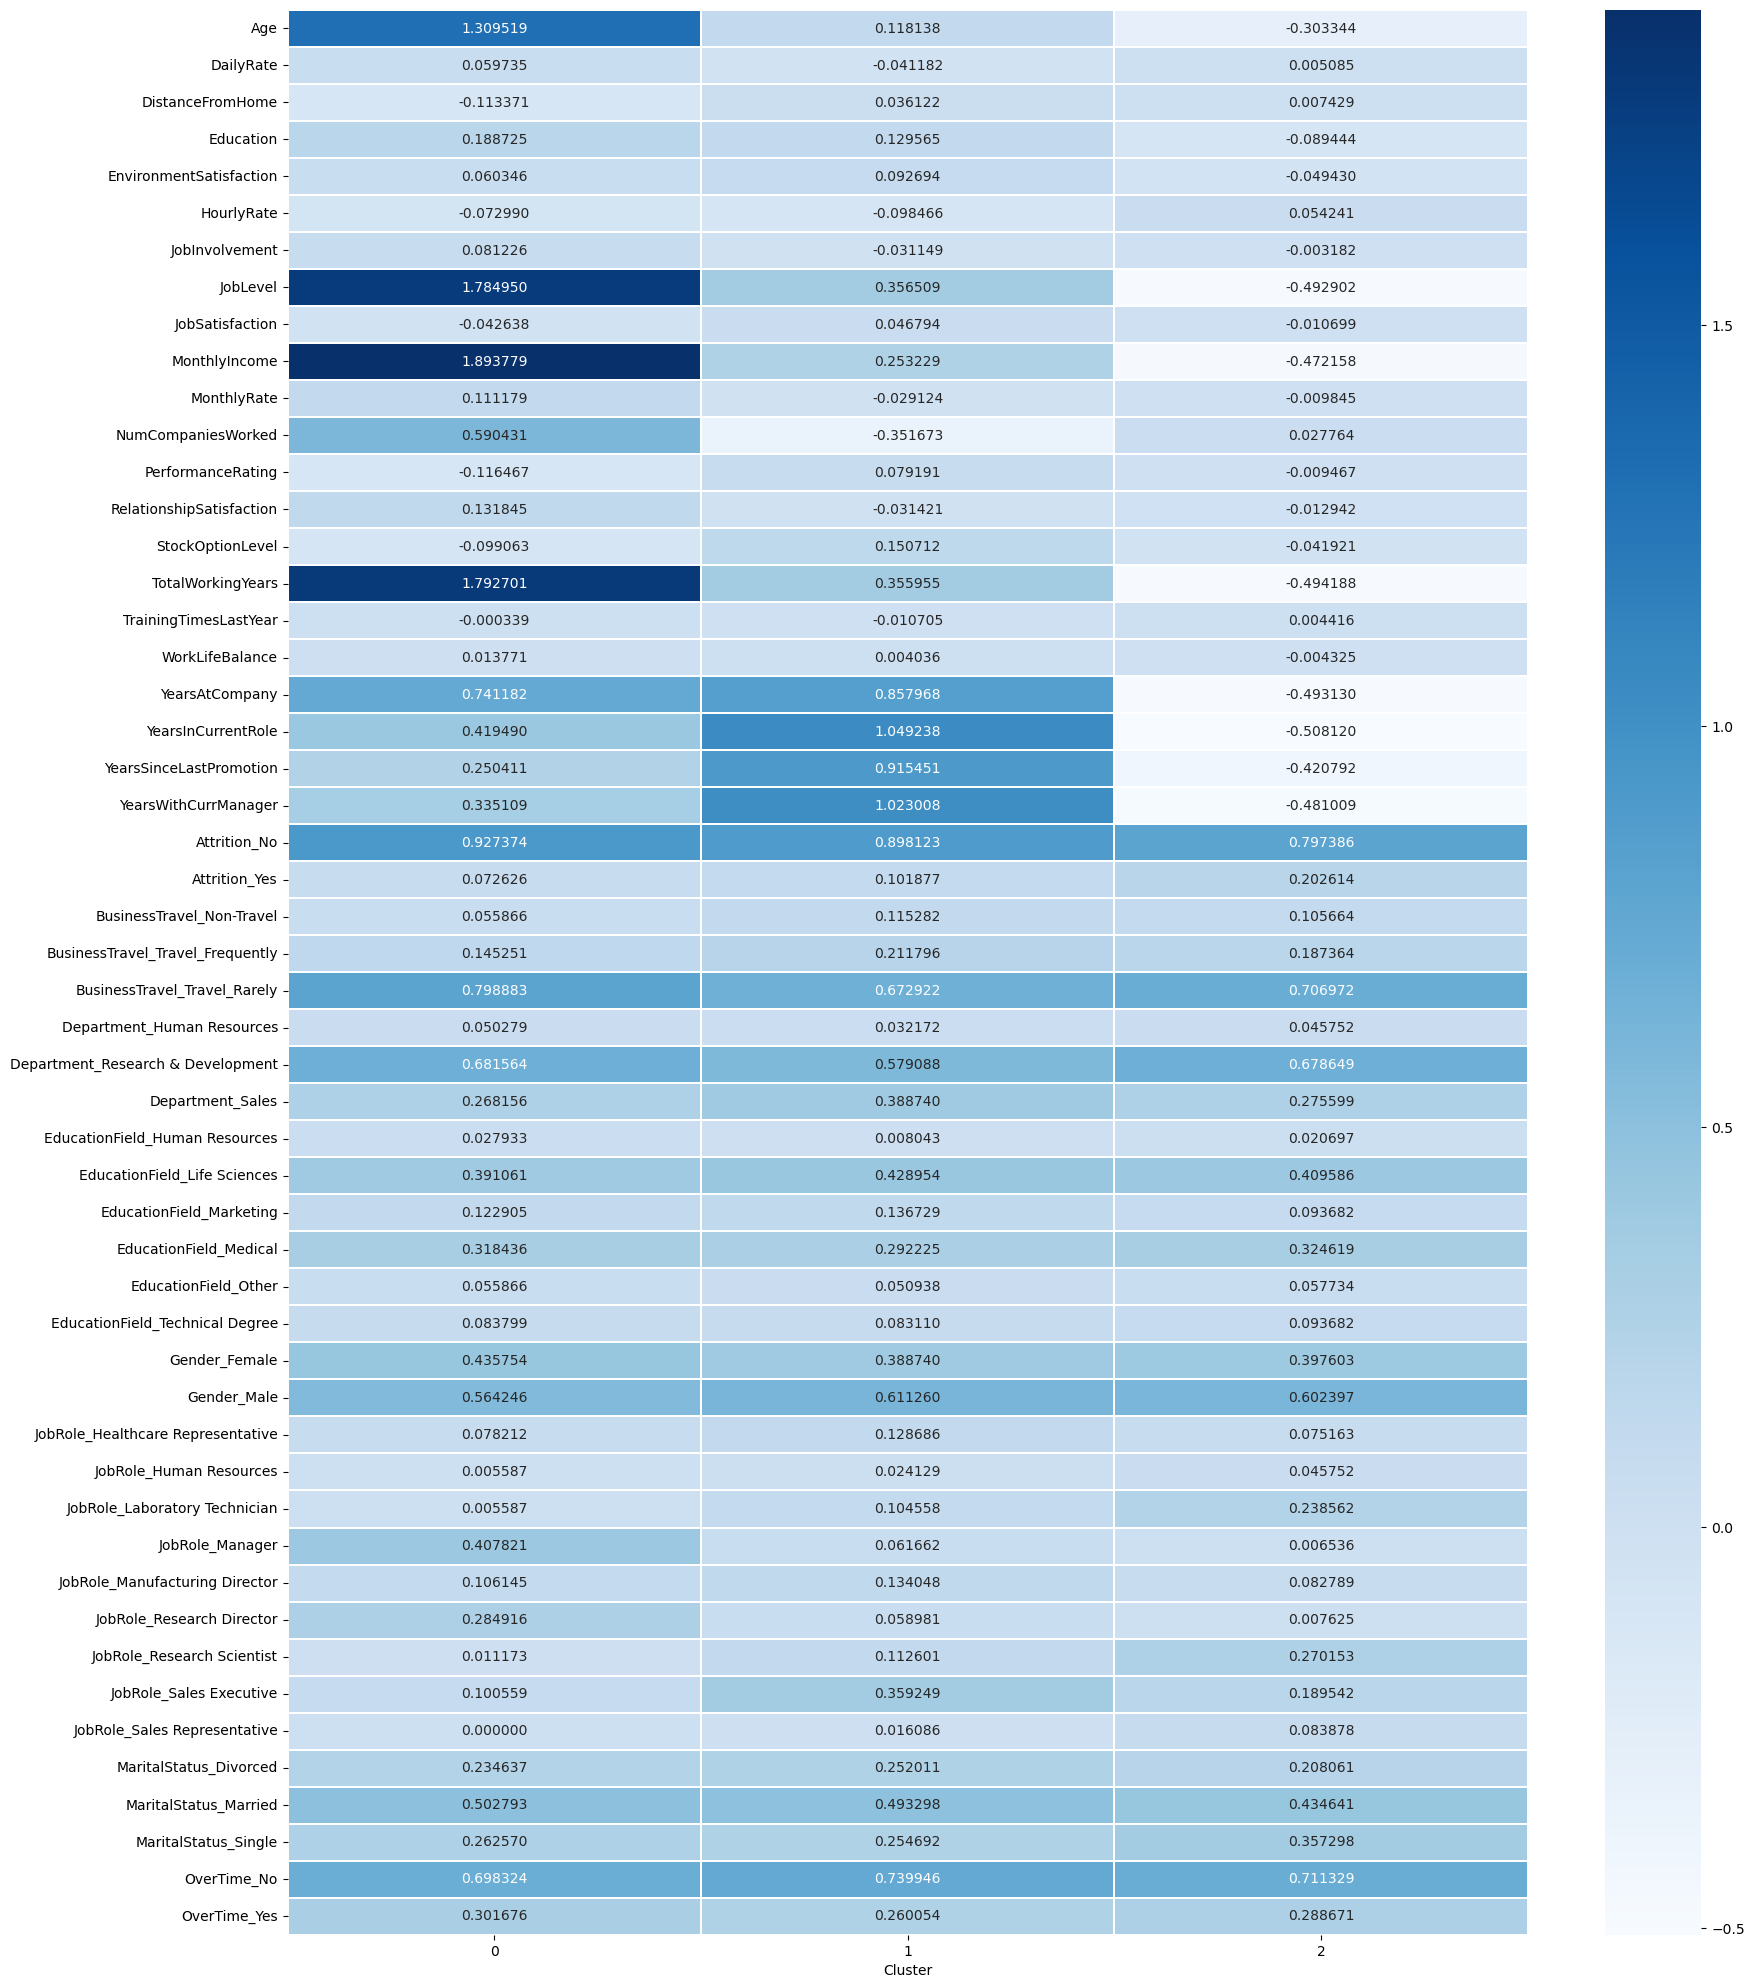

In [11]:
# checking the cluster
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
y_pred = kmeans.fit_predict(X_reduced[:,:2])

data_plot["Cluster"] = y_pred
data_plot[data_plot["Cluster"]==1].mean()
cluster_mean = data_plot.groupby(["Cluster"]).mean().T
plt.figure(figsize=(20, 25))
sns.heatmap(cluster_mean, annot = True, fmt='1f', linewidth = 0.1, annot_kws = {'fontsize':10}, cmap="Blues")
plt.show()

<font size="3"> The result indicates that the employee data can be quite nicely split into groups if we consider some of the factors such as Age, Job Level, Monthly Income, Total Working Years. This means that if we had to make three groups from the employees, best three groups can be defined based on these factors. </font>

<font size="3"> We can see that Cluster 0 contains employees with older ages, higher job levels, higher incomes, and longer total working years. Cluster 1 seems to have middle-aged employees with a medium level of those variables, and Cluster 2 appears to have a younger generation with fewer working years.  </font>

## 4. High Performers vs Average Performers (Reasons for Attrition)

### 4.1. Attrition Rate

In [12]:
# total # of Attrition
print(data["Attrition"].value_counts(), "\n") # No     1233, Yes     237

# attrition based on PerformanceRating
category_check_data = data.copy()
category = ["PerformanceRating"]

for i in category :
    total_ppl = category_check_data.groupby(i).size()
    attr_y = category_check_data.groupby(i).apply(lambda group : group[group["Attrition"]=="Yes"].count())["Attrition"]
    new_hires = category_check_data.groupby(i).apply(lambda group : group[group["YearsAtCompany"]==0].count())["YearsAtCompany"]
    start_ppl = total_ppl - new_hires
    end_ppl = start_ppl - attr_y + new_hires
    attr_rate = attr_y/((start_ppl + end_ppl)/2)
    print(attr_rate)
    print()

Attrition
No     1233
Yes     237
Name: count, dtype: int64 

PerformanceRating
0    0.177699
1    0.181373
dtype: float64



### 4.2. ANOVA Test

In [13]:
# ANOVA based on groups of our interest

category_check_data["Attrition"] = category_check_data["Attrition"].apply(lambda x : 1 if x == "Yes" else 0) 

for i in range(len(category)) :
    unique_cate = category_check_data[category[i]].unique()
    unique_cate_data = []
    for j in unique_cate :
        unique_cate_data.append(category_check_data[category_check_data[category[i]] == j]['Attrition'].tolist())
    f_statistic, p_value = f_oneway(*unique_cate_data)
    print(f"F-statistic {category[i]}: ", f_statistic)
    print(f"p-value {category[i]}:", p_value, "\n")

# The result indicates that gruops with different PerformanceRating seem to show no difference in their means.

F-statistic PerformanceRating:  0.01225039553422336
p-value PerformanceRating: 0.9118840421067758 



### 4.3. Modeling

### 4.3.1. High Performer

In [14]:
# High Performer Logistic Regression
data_high = pd.read_csv("dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data_high = data_high.loc[data_high["PerformanceRating"]==4,].drop(columns = ["PerformanceRating"])

# Remove duplicated or similar metrics variables
data_high = data_high.drop(columns = ["Age", "EmployeeCount", "EmployeeNumber", "DailyRate", "HourlyRate", "MonthlyRate",  
                            "MaritalStatus", "Over18", "StandardHours"])

# dummy variables creation for categorical variables & y variable transformation
X_high = pd.get_dummies(data_high.drop(columns=["Attrition"]))
y_high = data_high["Attrition"].apply(lambda x : 1 if x == "Yes" else 0)
numeric_high = X_high.select_dtypes(["float64", "int64"]).columns

print(f'The # of variables used (including dummies) : {len(X_high.columns)}')


# Cross-validation 50 times
cv_score_high = []
cv_cm_high = []
cv_coef_high = []

np.random.seed(42)

cv_high = 50

for i in range(cv_high) :
    X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, train_size = 0.8, test_size=0.2)
    
    X_train[numeric_high] = StandardScaler().fit_transform(X_train[numeric_high])
    X_test[numeric_high] = StandardScaler().fit_transform(X_test[numeric_high])
    
    # SMOTE resampling
    sm = SMOTE(random_state=42, sampling_strategy=0.9) # chosen by gridCV
    X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
    
    # Logistic Regression
    logit_high = LogisticRegression(random_state=42, C=0.05) # chosen by gridCV
    y_pred_high = logit_high.fit(X_train_smt, y_train_smt).predict(X_test)
    cv_score_high.append(f1_score(y_test, y_pred_high))
    cv_coef_high.append(logit_high.coef_)
    cv_cm_high.append(confusion_matrix(y_test, y_pred_high))

print(f'F1 score of the Logistic Regression using all variables : {np.mean(cv_score_high)}')
print("Coefficients of Logistic Regression: ")

The # of variables used (including dummies) : 43
F1 score of the Logistic Regression using all variables : 0.5431448426762062
Coefficients of Logistic Regression: 


In [15]:
highp_coef_df=pd.DataFrame(index=list(X_high.columns), data=list(cv_coef_high[0][0])).sort_values(ascending=False, 
                                                                                                  by=0).reset_index()
highp_coef_df.columns = ["Variable", "Coef"]
highp_coef_df

,Variable,Coef
0,OverTime_Yes,0.586759
1,DistanceFromHome,0.443452
2,EducationField_Life Sciences,0.379157
3,BusinessTravel_Travel_Frequently,0.343210
4,EducationField_Technical Degree,0.311800
5,Department_Sales,0.288216
6,JobRole_Laboratory Technician,0.258697
7,JobRole_Sales Representative,0.244760
8,JobRole_Healthcare Representative,0.218625
9,Gender_Female,0.206897


<Figure size 1000x600 with 0 Axes>

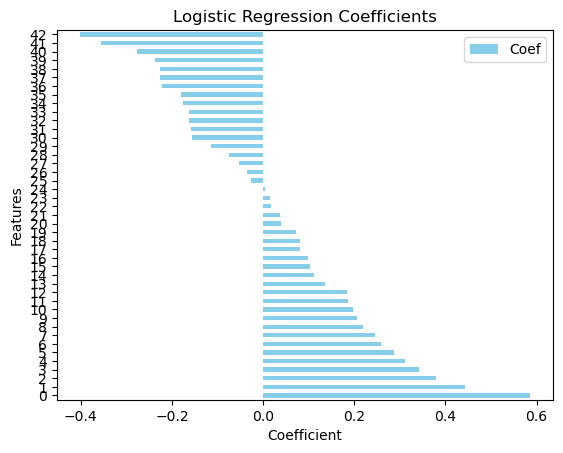

In [16]:
plt.figure(figsize=(10, 6))
highp_coef_df.plot(kind="barh", color="skyblue")
plt.xlabel("Coefficient")
plt.ylabel("Features", rotation=90)
plt.title("Logistic Regression Coefficients")
plt.show()

In [17]:
# Top 5 important variables from logit
highp_coef_df_abs = highp_coef_df["Coef"].abs() # absolute coef
highp_abs_df = pd.DataFrame(data=[highp_coef_df["Variable"], highp_coef_df_abs]).T.sort_values(by="Coef", ascending=False)
highp_abs_df["Coef"]=highp_abs_df["Coef"].astype("float")
top5_coef_highp = highp_abs_df.nlargest(5, "Coef").reset_index(drop=True)

print(f'Top 5 variables that might have affected to Attrition in High Performers are {list(top5_coef_highp["Variable"])} in order.')
top5_coef_highp

Top 5 variables that might have affected to Attrition in High Performers are ['OverTime_Yes', 'DistanceFromHome', 'JobSatisfaction', 'EducationField_Life Sciences', 'StockOptionLevel'] in order.


,Variable,Coef
0,OverTime_Yes,0.586759
1,DistanceFromHome,0.443452
2,JobSatisfaction,0.402694
3,EducationField_Life Sciences,0.379157
4,StockOptionLevel,0.355759


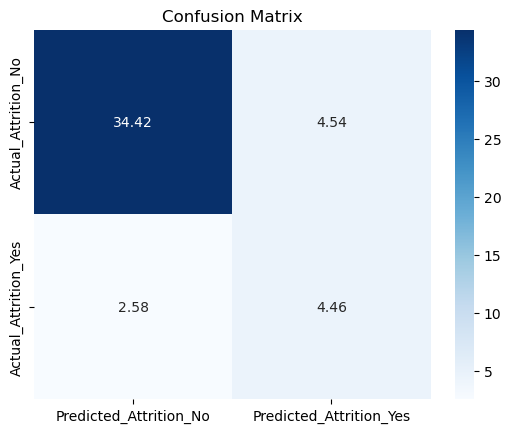

In [18]:
# Mean of Confusion Matrix of the high performer model
cm_mean_hp = np.mean(cv_cm_high,axis=0)

# heatmap
sns.heatmap(cm_mean_hp, annot=True, fmt='.2f', cmap='Blues', cbar=True, 
            xticklabels=['Predicted_Attrition_No', 'Predicted_Attrition_Yes'], 
            yticklabels=['Actual_Attrition_No', 'Actual_Attrition_Yes'])
plt.title('Confusion Matrix')
plt.show()

### 4.3.2. Average Performer

In [19]:
# Average Performer Logistic Regression
data_avg = pd.read_csv("dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data_avg = data_avg.loc[data_avg["PerformanceRating"]==3,].drop(columns = ["PerformanceRating"])

# Remove duplicated or similar metrics variables
data_avg = data_avg.drop(columns = ["Age", "EmployeeCount", "EmployeeNumber", "DailyRate", "HourlyRate", "MonthlyRate",  
                            "MaritalStatus", "Over18", "StandardHours"])

# dummy variables creation for categorical variables & y variable transformation
X_avg = pd.get_dummies(data_avg.drop(columns=["Attrition"]))
y_avg = data_avg["Attrition"].apply(lambda x : 1 if x == "Yes" else 0)
numeric_avg = X_avg.select_dtypes(["float64", "int64"]).columns

print(f'The # of variables used (including dummies) : {len(X_avg.columns)}')


# Cross-validation 50 times
cv_score_avg = []
cv_cm_avg = []
cv_coef_avg = []

np.random.seed(42)

cv_avg = 50

for i in range(cv_avg) :
    X_train, X_test, y_train, y_test = train_test_split(X_avg, y_avg, train_size = 0.8, test_size=0.2)
    
    X_train[numeric_avg] = StandardScaler().fit_transform(X_train[numeric_avg])
    X_test[numeric_avg] = StandardScaler().fit_transform(X_test[numeric_avg])
    
    # SMOTE resampling
    sm = SMOTE(random_state=42, sampling_strategy=0.6) #chosen by gridCV
    X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
    
    # Logistic Regression
    logit_avg = LogisticRegression(random_state=42, C=0.05, max_iter=5000) #chosen by gridCV
    y_pred_avg = logit_avg.fit(X_train_smt, y_train_smt).predict(X_test)
    cv_score_avg.append(f1_score(y_test, y_pred_avg))
    cv_coef_avg.append(logit_avg.coef_)
    cv_cm_avg.append(confusion_matrix(y_test, y_pred_avg))

print(f'F1 score of the Logistic Regression using all variables : {np.mean(cv_score_avg)}')
print("Coefficients of Logistic Regression: ")

The # of variables used (including dummies) : 43
F1 score of the Logistic Regression using all variables : 0.5241876458046589
Coefficients of Logistic Regression: 


In [20]:
avgp_coef_df=pd.DataFrame(index=list(X_avg.columns), data=list(cv_coef_avg[0][0])).sort_values(ascending=False, 
                                                                                                  by=0).reset_index()
avgp_coef_df.columns = ["Variable", "Coef"]
avgp_coef_df

,Variable,Coef
0,OverTime_Yes,1.242454
1,BusinessTravel_Travel_Frequently,0.739282
2,Gender_Male,0.719595
3,JobRole_Laboratory Technician,0.718127
4,Department_Sales,0.695348
5,EducationField_Technical Degree,0.676389
6,EducationField_Marketing,0.614689
7,JobRole_Sales Representative,0.552834
8,EducationField_Medical,0.545544
9,YearsSinceLastPromotion,0.521870


<Figure size 1000x600 with 0 Axes>

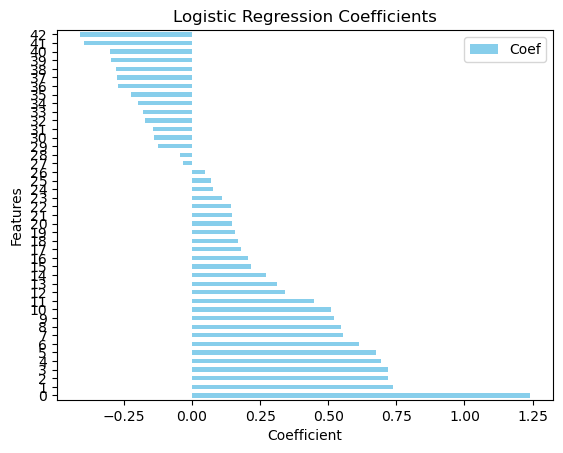

In [21]:
plt.figure(figsize=(10, 6))
avgp_coef_df.plot(kind="barh", color="skyblue")
plt.xlabel("Coefficient")
plt.ylabel("Features", rotation=90)
plt.title("Logistic Regression Coefficients")
plt.show()

In [22]:
# Top 5 important variables from logit
avgp_coef_df_abs = avgp_coef_df["Coef"].abs() # absolute coef
avgp_coef_df = pd.DataFrame(data=[avgp_coef_df["Variable"], avgp_coef_df_abs]).T.sort_values(by="Coef", ascending=False)
avgp_coef_df["Coef"]=avgp_coef_df["Coef"].astype("float")
top5_coef_avgp = avgp_coef_df.nlargest(5, "Coef").reset_index(drop=True)

print(f'Top 5 variables that might have affected to Attrition in Avg. Performers are {list(top5_coef_avgp["Variable"])} in order.')
top5_coef_avgp

Top 5 variables that might have affected to Attrition in Avg. Performers are ['OverTime_Yes', 'BusinessTravel_Travel_Frequently', 'Gender_Male', 'JobRole_Laboratory Technician', 'Department_Sales'] in order.


,Variable,Coef
0,OverTime_Yes,1.242454
1,BusinessTravel_Travel_Frequently,0.739282
2,Gender_Male,0.719595
3,JobRole_Laboratory Technician,0.718127
4,Department_Sales,0.695348


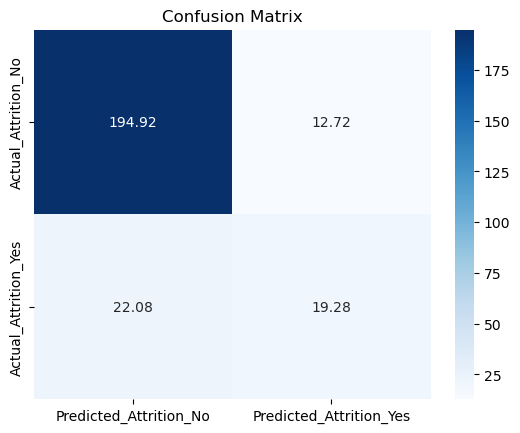

In [23]:
# Mean of Confusion Matrix of the avg. performer model
cm_mean_avg = np.mean(cv_cm_avg,axis=0)

# heatmap
sns.heatmap(cm_mean_avg, annot=True, fmt='.2f', cmap='Blues', cbar=True, 
            xticklabels=['Predicted_Attrition_No', 'Predicted_Attrition_Yes'], 
            yticklabels=['Actual_Attrition_No', 'Actual_Attrition_Yes'])
plt.title('Confusion Matrix')
plt.show()

<font size="3">From the simple Logistic Regression results above, several insights can be drawn:

1. Despite being a simple model, the Logistic Regression yields a decent F1 Score (>0.5), effectively classifying attrition.
2. Both high performers and average performers show a tendency for attrition triggered by overtime work.
3. However, while average performers are notably impacted by overtime (coefficient degree > 1), high performers appear to be less affected by overtime (coefficient degree < 1), but influenced by multiple factors simultaneously.
4. In comparison to average performers, high performers seem to be slightly more affected by job satisfaction (High Performers: -0.402694, Average Performers: -0.225797).
5. Although the coefficients' degrees are not high, high performers appear to be slightly more affected by distance from home (High Performers: 0.443452, Average Performers: 0.108800).

### <font size="3"> Therefore, to prevent attrition among high performers, the company could implement strategies to reduce overtime work and address issues related to job satisfaction. Additionally, offering company stocks instead of cash bonuses could serve as an incentive to retain high-performing employees. Moreover, when hiring, considering the commuting distance of candidates could also be beneficial.